In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [8]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahinmushfique","key":"29e9c9a1aebc63ecec382e70d0814bb8"}'}

In [9]:
os.environ["KAGGLE_CONFIF_DIR"] = "/xray dataset"

In [10]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

Dataset URL: https://www.kaggle.com/datasets/sid321axn/covid-cxr-image-dataset-research
License(s): CC0-1.0
100% 570M/572M [00:05<00:00, 41.7MB/s]
100% 572M/572M [00:05<00:00, 100MB/s] 


In [11]:
!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [12]:

for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.


In [13]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [14]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img

['person1321_virus_2279.jpeg']
image shape (1088, 1632)


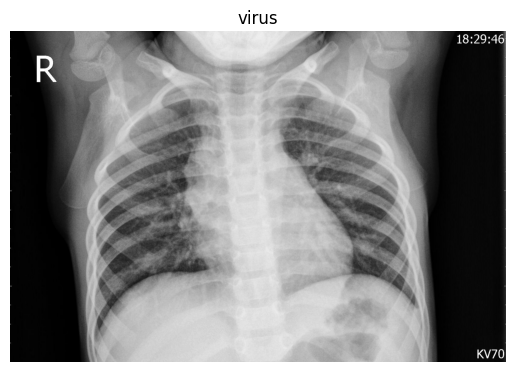

In [15]:

img = view_image("/content/COVID_IEEE/","virus")

['IM-0503-0001.jpeg']
image shape (1171, 1504)


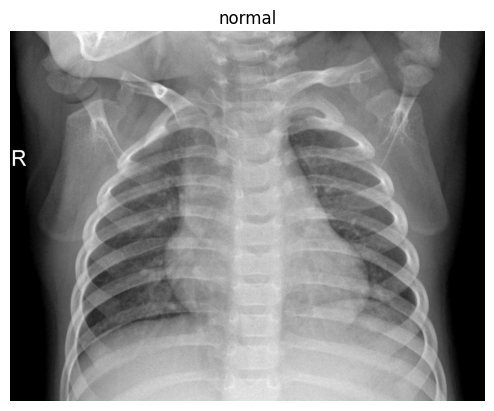

In [16]:
img = view_image("/content/COVID_IEEE/","normal")

['EUNVlT9X0AAJyqS.jfif']
image shape (2021, 2021, 3)


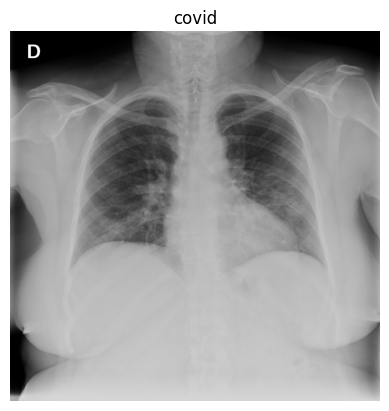

In [17]:

img = view_image("/content/COVID_IEEE/","covid")

In [18]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [19]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)




In [20]:
virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(2)


In [21]:

data = np.array(data) / 255.0
img_labels = np.array(labels)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [23]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [25]:

model.fit(X_train, y_train, validation_split=0.3, epochs=20, batch_size=32)

Epoch 1/20
32/32 [==============================] - 23s 376ms/step - loss: 0.8653 - accuracy: 0.6059 - val_loss: 0.6211 - val_accuracy: 0.7740
Epoch 2/20
32/32 [==============================] - 4s 136ms/step - loss: 0.4475 - accuracy: 0.8314 - val_loss: 0.3963 - val_accuracy: 0.8493
Epoch 3/20
32/32 [==============================] - 4s 139ms/step - loss: 0.2940 - accuracy: 0.8912 - val_loss: 0.3569 - val_accuracy: 0.9064
Epoch 4/20
32/32 [==============================] - 4s 132ms/step - loss: 0.1796 - accuracy: 0.9324 - val_loss: 0.2137 - val_accuracy: 0.9178
Epoch 5/20
32/32 [==============================] - 4s 134ms/step - loss: 0.1054 - accuracy: 0.9627 - val_loss: 0.2762 - val_accuracy: 0.9315
Epoch 6/20
32/32 [==============================] - 4s 134ms/step - loss: 0.1277 - accuracy: 0.9598 - val_loss: 0.2791 - val_accuracy: 0.9338
Epoch 7/20
32/32 [==============================] - 4s 134ms/step - loss: 0.0999 - accuracy: 0.9627 - val_loss: 0.3421 - val_accuracy: 0.9155
Epoch

Text(0.5, 1.0, 'Training-Validation Accuracy')

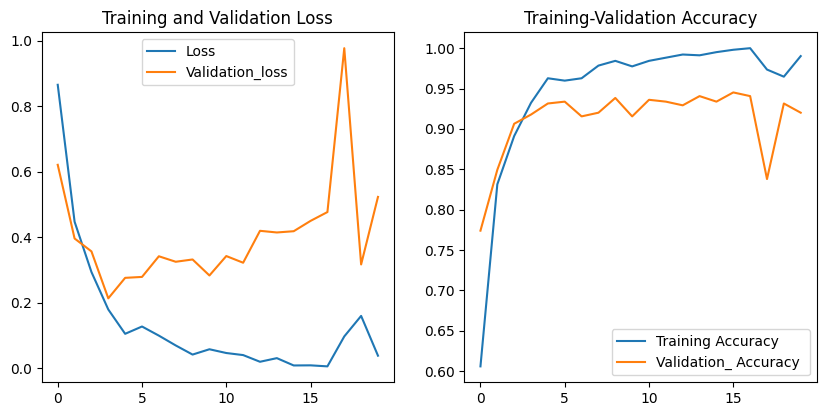

In [26]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [27]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 1s 123ms/step


In [28]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       108
           1       0.92      0.92      0.92       129
           2       0.96      0.88      0.91       128

    accuracy                           0.92       365
   macro avg       0.92      0.92      0.92       365
weighted avg       0.92      0.92      0.92       365



In [29]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,105,2,1
normal,6,119,4
virus,8,8,112


#using mobile net because our model falsely predicted 10 covid cases as normal and virus cases.

In [30]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17225924/17225924 [==============================] - 0s 0us/step


In [31]:
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [32]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [34]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 9s 159ms/step - loss: 6.6957 - accuracy: 0.7794 - val_loss: 1.2703 - val_accuracy: 0.9178
Epoch 2/15
32/32 [==============================] - 2s 70ms/step - loss: 0.3640 - accuracy: 0.9608 - val_loss: 0.5455 - val_accuracy: 0.9384
Epoch 3/15
32/32 [==============================] - 3s 80ms/step - loss: 0.3381 - accuracy: 0.9608 - val_loss: 0.6517 - val_accuracy: 0.9566
Epoch 4/15
32/32 [==============================] - 2s 73ms/step - loss: 0.1374 - accuracy: 0.9775 - val_loss: 0.4498 - val_accuracy: 0.9566
Epoch 5/15
32/32 [==============================] - 2s 70ms/step - loss: 0.1064 - accuracy: 0.9843 - val_loss: 0.6141 - val_accuracy: 0.9498
Epoch 6/15
32/32 [==============================] - 2s 74ms/step - loss: 0.0696 - accuracy: 0.9912 - val_loss: 0.3269 - val_accuracy: 0.9680
Epoch 7/15
32/32 [==============================] - 2s 74ms/step - loss: 0.0063 - accuracy: 0.9990 - val_loss: 0.3626 - val_accuracy: 0.9658
Epoch 8/15
3

Text(0.5, 1.0, 'Training-Validation Accuracy')

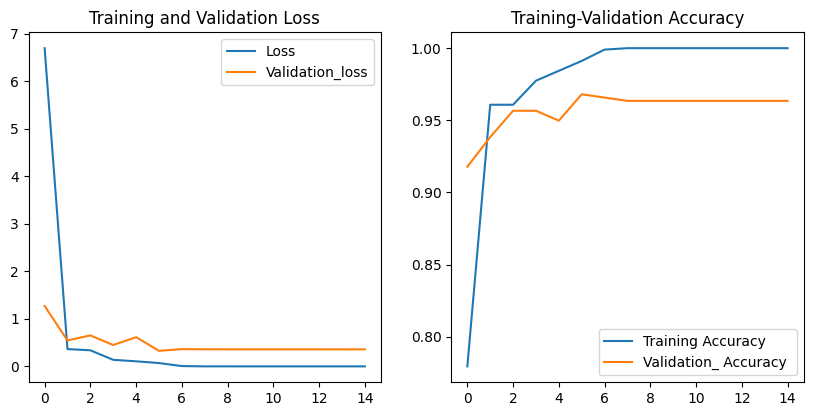

In [35]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [36]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 1s 89ms/step


In [37]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.95      0.95       129
           2       0.95      0.95      0.95       128

    accuracy                           0.96       365
   macro avg       0.96      0.96      0.96       365
weighted avg       0.96      0.96      0.96       365



In [38]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,105,1,2
normal,1,123,5
virus,1,5,122



#So, we can call this model as Custom Mobile Net Classifier

In [39]:
# Assuming 'model' is your trained model
model.save('custom_Model.h5')  # Save the model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
# Import the files module from google.colab to download the model file
from google.colab import files
files.download('custom_Model.h5')  # Download the model file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:

!pip install tensorflow pydot
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


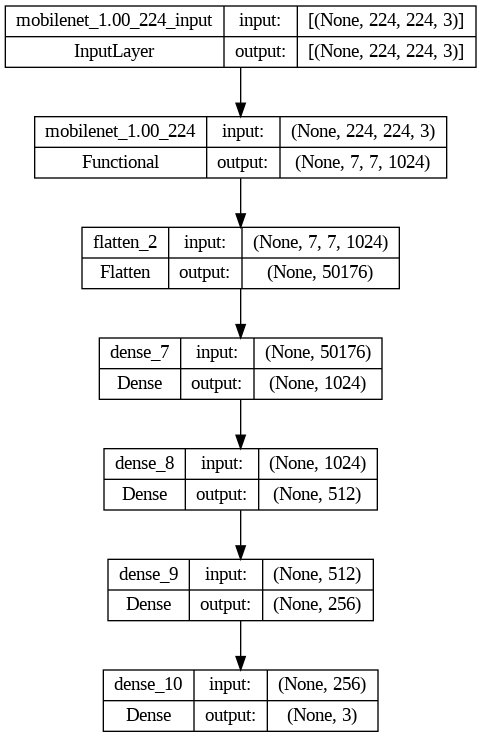

In [42]:

import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Recreate your model
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights="imagenet", include_top=False)
for layer in base_model.layers:
    layer.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation="relu"),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=3, activation="softmax")
])

# Save the model plot
plot_model(model, to_file='CustomMobileNetClassifier.png', show_shapes=True, show_layer_names=True)

# Display the image in the notebook
from IPython.display import Image
Image(filename='CustomMobileNetClassifier.png')


# VGG19 Model starts from here(Best accuracy)

In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model







In [44]:
# Load the pre-trained VGG19 model
base_model = tf.keras.applications.VGG19(input_shape=[224, 224, 3], weights="imagenet", include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [45]:

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [46]:

# Add custom layers on top of the VGG19 base
x = Flatten()(base_model.output)
x = Dense(units=1024, activation="relu")(x)
x = Dense(units=512, activation="relu")(x)
x = Dense(units=256, activation="relu")(x)
prediction_layer = Dense(units=3, activation="softmax")(x)

In [47]:


# Create the full model
model = Model(inputs=base_model.input, outputs=prediction_layer)


In [48]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:

# Display the model summary
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [50]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 31s 716ms/step - loss: 1.6217 - accuracy: 0.6824 - val_loss: 0.3149 - val_accuracy: 0.8881
Epoch 2/15
32/32 [==============================] - 7s 234ms/step - loss: 0.1858 - accuracy: 0.9431 - val_loss: 0.2139 - val_accuracy: 0.9247
Epoch 3/15
32/32 [==============================] - 8s 244ms/step - loss: 0.1199 - accuracy: 0.9647 - val_loss: 0.1816 - val_accuracy: 0.9566
Epoch 4/15
32/32 [==============================] - 8s 247ms/step - loss: 0.0991 - accuracy: 0.9637 - val_loss: 0.1789 - val_accuracy: 0.9498
Epoch 5/15
32/32 [==============================] - 7s 232ms/step - loss: 0.0701 - accuracy: 0.9735 - val_loss: 0.2848 - val_accuracy: 0.9132
Epoch 6/15
32/32 [==============================] - 7s 234ms/step - loss: 0.1057 - accuracy: 0.9608 - val_loss: 0.1049 - val_accuracy: 0.9658
Epoch 7/15
32/32 [==============================] - 7s 233ms/step - loss: 0.0468 - accuracy: 0.9843 - val_loss: 0.1654 - val_accuracy: 0.9589
Epoch

Text(0.5, 1.0, 'Training-Validation Accuracy')

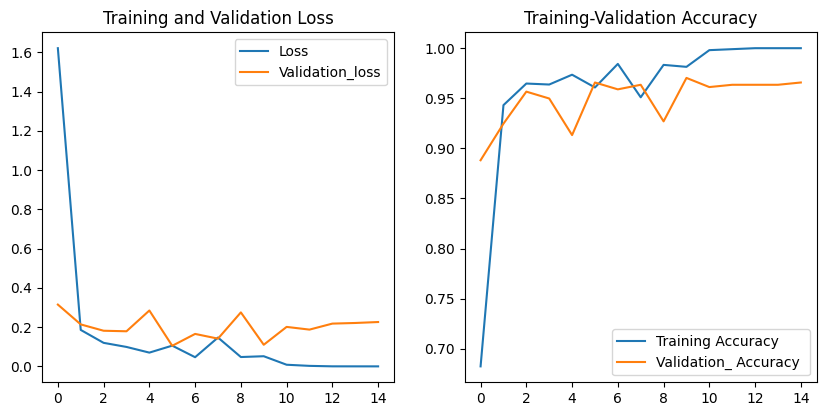

In [51]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [52]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 6s 474ms/step


In [53]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.96      0.96      0.96       129
           2       0.97      0.95      0.96       128

    accuracy                           0.97       365
   macro avg       0.97      0.97      0.97       365
weighted avg       0.97      0.97      0.97       365



In [54]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,107,1,0
normal,1,124,4
virus,2,4,122


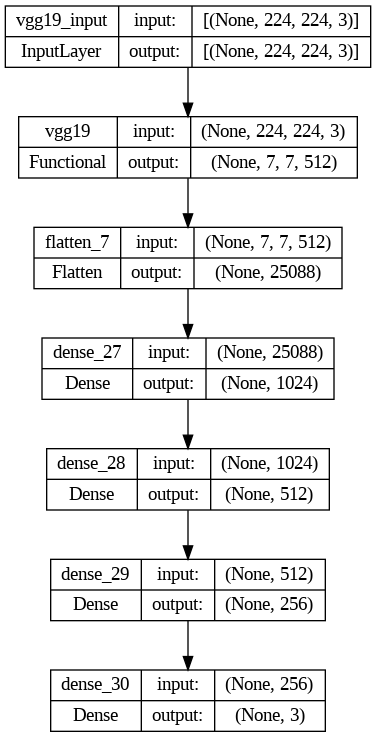

In [91]:

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

# Load the pre-trained VGG19 model
base_model = tf.keras.applications.VGG19(input_shape=[224, 224, 3], weights="imagenet", include_top=False)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create the custom model
model = Sequential([
    base_model,
    Flatten(),
    Dense(units=1024, activation="relu"),
    Dense(units=512, activation="relu"),
    Dense(units=256, activation="relu"),
    Dense(units=3, activation="softmax")
])

# Save the model plot
plot_model(model, to_file='CustomVGG19Classifier.png', show_shapes=True, show_layer_names=True)

# Display the image in the notebook
from IPython.display import Image
Image(filename='CustomVGG19Classifier.png')



# EfficientNetB0 starts from here (WORST ONE)

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model


In [56]:

# Load the pre-trained EfficientNetB0 model
base_model = tf.keras.applications.EfficientNetB0(input_shape=[224, 224, 3], weights="imagenet", include_top=False)

16705208/16705208 [==============================] - 0s 0us/step


In [57]:

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [58]:
# Add custom layers on top of the EfficientNetB0 base
x = Flatten()(base_model.output)
x = Dense(units=1024, activation="relu")(x)
x = Dense(units=512, activation="relu")(x)
x = Dense(units=256, activation="relu")(x)
prediction_layer = Dense(units=3, activation="softmax")(x)

In [59]:

# Create the full model
model = Model(inputs=base_model.input, outputs=prediction_layer)

In [60]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:


# Display the model summary
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_4[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]'] 

In [62]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 21s 347ms/step - loss: 7.3252 - accuracy: 0.3559 - val_loss: 2.5072 - val_accuracy: 0.3721
Epoch 2/15
32/32 [==============================] - 4s 122ms/step - loss: 1.5419 - accuracy: 0.3147 - val_loss: 1.3732 - val_accuracy: 0.2671
Epoch 3/15
32/32 [==============================] - 4s 122ms/step - loss: 1.2211 - accuracy: 0.3480 - val_loss: 1.2799 - val_accuracy: 0.2671
Epoch 4/15
32/32 [==============================] - 4s 127ms/step - loss: 1.2066 - accuracy: 0.3539 - val_loss: 1.3641 - val_accuracy: 0.2671
Epoch 5/15
32/32 [==============================] - 3s 108ms/step - loss: 1.1881 - accuracy: 0.3343 - val_loss: 1.1482 - val_accuracy: 0.2671
Epoch 6/15
32/32 [==============================] - 4s 122ms/step - loss: 1.1740 - accuracy: 0.3471 - val_loss: 1.1373 - val_accuracy: 0.2671
Epoch 7/15
32/32 [==============================] - 4s 126ms/step - loss: 1.1354 - accuracy: 0.3461 - val_loss: 1.0885 - val_accuracy: 0.3607
Epoch

Text(0.5, 1.0, 'Training-Validation Accuracy')

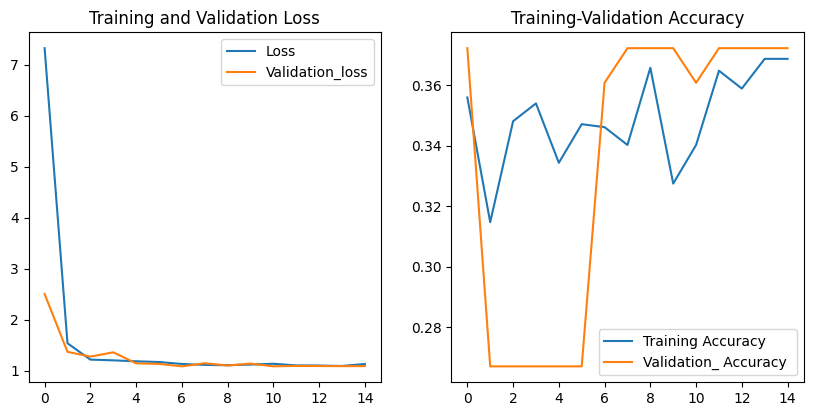

In [63]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [64]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 3s 161ms/step


In [86]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60       108
           1       0.82      0.98      0.90       129
           2       0.67      0.86      0.75       128

    accuracy                           0.78       365
   macro avg       0.83      0.76      0.75       365
weighted avg       0.82      0.78      0.76       365



In [66]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,0,108,0
normal,0,129,0
virus,0,128,0


# RESNET50 starts here


In [67]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model




In [68]:
# Load the pre-trained ResNet50 model
base_model = tf.keras.applications.ResNet50(input_shape=[224, 224, 3], weights="imagenet", include_top=False)



94765736/94765736 [==============================] - 0s 0us/step


In [69]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False


In [70]:

# Add custom layers on top of the ResNet50 base
x = Flatten()(base_model.output)
x = Dense(units=1024, activation="relu")(x)
x = Dense(units=512, activation="relu")(x)
x = Dense(units=256, activation="relu")(x)
prediction_layer = Dense(units=3, activation="softmax")(x)



In [71]:
# Create the full model
model = Model(inputs=base_model.input, outputs=prediction_layer)



In [72]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [73]:

# Display the model summary
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [74]:
model.fit(X_train, y_train, validation_split=0.3, epochs=20, batch_size=32)

Epoch 1/20
32/32 [==============================] - 17s 336ms/step - loss: 5.0172 - accuracy: 0.3676 - val_loss: 1.0465 - val_accuracy: 0.4635
Epoch 2/20
32/32 [==============================] - 5s 166ms/step - loss: 1.0420 - accuracy: 0.5196 - val_loss: 0.7216 - val_accuracy: 0.6781
Epoch 3/20
32/32 [==============================] - 6s 201ms/step - loss: 0.6489 - accuracy: 0.7127 - val_loss: 0.6055 - val_accuracy: 0.7397
Epoch 4/20
32/32 [==============================] - 5s 163ms/step - loss: 0.6234 - accuracy: 0.7255 - val_loss: 0.5543 - val_accuracy: 0.7717
Epoch 5/20
32/32 [==============================] - 5s 164ms/step - loss: 0.5509 - accuracy: 0.7529 - val_loss: 0.6897 - val_accuracy: 0.7260
Epoch 6/20
32/32 [==============================] - 6s 202ms/step - loss: 0.5831 - accuracy: 0.7588 - val_loss: 0.7379 - val_accuracy: 0.7215
Epoch 7/20
32/32 [==============================] - 5s 167ms/step - loss: 0.4912 - accuracy: 0.7971 - val_loss: 0.4767 - val_accuracy: 0.8105
Epoch

Text(0.5, 1.0, 'Training-Validation Accuracy')

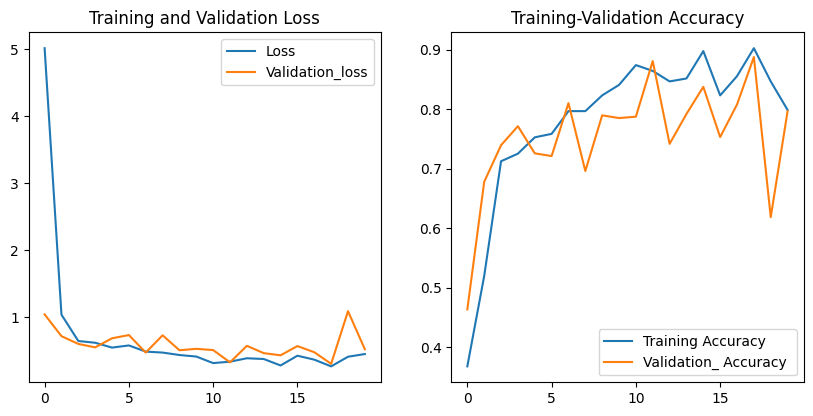

In [75]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [76]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 4s 228ms/step


In [77]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60       108
           1       0.82      0.98      0.90       129
           2       0.67      0.86      0.75       128

    accuracy                           0.78       365
   macro avg       0.83      0.76      0.75       365
weighted avg       0.82      0.78      0.76       365



In [78]:

# Binarize the output for ROC curve computation
y_test_binarized = label_binarize(y_test_new, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]



In [80]:
# Compute ROC curve and ROC area for each class
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



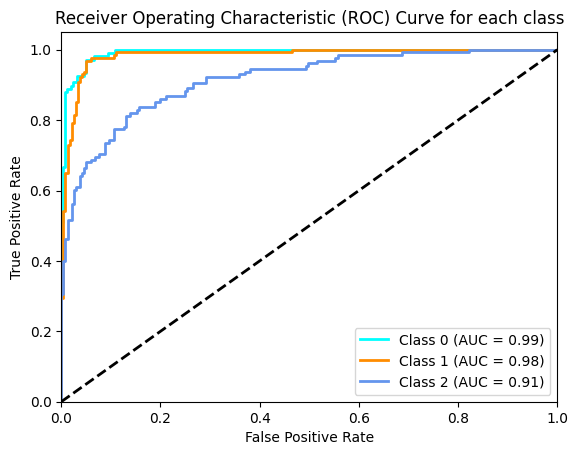

In [81]:
# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

In [82]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,46,9,53
normal,0,127,2
virus,0,18,110
